# 6.2 Exploring Relationships in Canadian Wildfires Dataframe
** **

## List of Contents:

1. Importing libraries and files


2. Exploring data


3. Data cleaning


4. Merging and transforming dataframes


5. Exploring relationships
    - 5.1. Correlations
    - 5.2. Scatterplots
    - 5.3. Pair plots
    - 5.4. Categorical plots
    
    
** **

### 1. Importing libraries and files
** **


In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import geopy.distance

In [87]:
# Checking the version of matplotlib

matplotlib.__version__

'3.5.2'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Selecting shared path

path = r'C:\Users\mehrn\OneDrive\Desktop\CareerFoundry Materials\Tasks\06 Advanced Analytics\15-03-2023 Canada Wildfires Analysis'

In [7]:
# Importing wrangled fires dataframe and "weather of Vancouver" open dataset provided by Environment Canada

df_fires = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'wrangled_wildfires.pkl'))

In [8]:
# Importing "weather of Alberta" open dataset provided by Environment Canada.


df_wthr_ab = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Data_Daily_Environment_Canada.csv'), usecols = [4,5,15,16,17,18,27], dtype={'Speed of Maximum Wind Gust (km/h)': str})

### 2. Exploring data

In [9]:
# Alberta weather information columns

df_wthr_ab.head()

,Station Latitude,Station Longitude,Date,Maximum Temperature (C),Minimum Temperature (C),Mean Temperature (C),Speed of Maximum Wind Gust (km/h)
0,53.57,-113.52,2021/04/14,16.2,-0.7,7.8,NaN
1,53.57,-113.52,2021/04/15,17.5,-1.2,8.2,NaN
2,53.57,-113.52,2021/05/10,16.2,1.4,8.8,NaN
3,53.57,-113.52,2021/05/11,17.3,6.2,11.7,NaN
4,53.57,-113.52,2021/01/27,-15.1,-17.0,-16.0,NaN


In [10]:
df_wthr_ab.shape

(71233, 7)

In [16]:
df_wthr_ab.dtypes

Station Latitude                     float64
Station Longitude                    float64
Date                                  object
Maximum Temperature (C)              float64
Minimum Temperature (C)              float64
Mean Temperature (C)                 float64
Speed of Maximum Wind Gust (km/h)     object
dtype: object

In [17]:
# Focusing on Alberta, as our weather dataset only contains data for Alberta

df_fires_ab = df_fires[df_fires['src_agency']=='AB']
df_fires_ab.shape

(62275, 8)

In [18]:
df_fires_ab.dtypes

src_agency     object
latitude      float64
longitude     float64
rep_date       object
size          float64
cause          object
prot_zone      object
eco_name       object
dtype: object

In [20]:
df_fires_ab.head()

,src_agency,latitude,longitude,rep_date,size,cause,prot_zone,eco_name
fire_id,,,,,,,,
149410,AB,58.7508,-111.0824,1983-05-26,2.0,H,,Taiga Shield West
149411,AB,59.5357,-110.7310,1983-06-19,1.0,L,,Taiga Shield West
149412,AB,58.7162,-111.1210,1983-06-25,0.1,H,,Taiga Shield West
149413,AB,58.7799,-111.0260,1983-06-28,0.1,H,,Taiga Shield West
149414,AB,58.7799,-111.0260,1983-06-28,0.1,L,,Taiga Shield West


### 3. Data Cleaning
** **

In [21]:
# Fixing mixed datatype

df_wthr_ab['Speed of Maximum Wind Gust (km/h)'] = df_wthr_ab['Speed of Maximum Wind Gust (km/h)'].replace('<31', '30').astype('float64')

In [22]:
# Making date formats consistent to merge with fires datafrme

df_wthr_ab['Date'] = df_wthr_ab['Date'].str.replace("/","-")

In [23]:
# Dropping rows with null temprature, duplicates, and renaming Date to rep_date (to be consistent and used in merge later)

df_wthr_ab_clean = df_wthr_ab.loc[df_wthr_ab['Mean Temperature (C)'].isnull() == False]
df_wthr_ab_clean = df_wthr_ab_clean.drop_duplicates(subset=['Station Latitude', 'Station Longitude', 'Date'])
df_wthr_ab_clean = df_wthr_ab_clean.rename(columns = {'Date': 'rep_date'})

In [24]:
df_fires_clean = df_fires.drop_duplicates(subset=['src_agency','rep_date'])
df_fires_clean.shape

(71367, 8)

In [25]:
df_wthr_ab_clean.shape

(59426, 7)

In [26]:
df_wthr_ab_clean

,Station Latitude,Station Longitude,rep_date,Maximum Temperature (C),Minimum Temperature (C),Mean Temperature (C),Speed of Maximum Wind Gust (km/h)
0,53.57,-113.52,2021-04-14,16.2,-0.7,7.8,NaN
1,53.57,-113.52,2021-04-15,17.5,-1.2,8.2,NaN
2,53.57,-113.52,2021-05-10,16.2,1.4,8.8,NaN
3,53.57,-113.52,2021-05-11,17.3,6.2,11.7,NaN
4,53.57,-113.52,2021-01-27,-15.1,-17.0,-16.0,NaN
...,...,...,...,...,...,...,...
71228,54.00,-113.47,2022-12-30,-9.1,-15.1,-12.1,NaN
71229,53.67,-113.86,2022-01-29,3.7,-2.3,0.7,NaN
71230,54.00,-113.47,2022-01-01,-7.7,-33.5,-20.6,NaN
71231,53.65,-113.35,2022-06-18,21.4,13.3,17.3,NaN


### 4. Merging and transforming dataframes

In [27]:
# Merging alberta dataset with fires on longitude/latitude/date columns

df_merged = df_fires_ab.merge(df_wthr_ab_clean, on = ['rep_date'])
df_merged.head()

,src_agency,latitude,longitude,rep_date,size,cause,prot_zone,eco_name,Station Latitude,Station Longitude,Maximum Temperature (C),Minimum Temperature (C),Mean Temperature (C),Speed of Maximum Wind Gust (km/h)
0,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.65,-113.35,18.1,12.6,15.4,NaN
1,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.55,-114.11,19.0,12.0,15.5,NaN
2,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.67,-113.47,17.9,11.9,14.9,NaN
3,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.57,-113.52,17.8,13.7,15.8,NaN
4,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.31,-113.61,17.3,13.2,15.3,NaN


In [28]:
# Deriving new column: 'distance', calculated by geographic distance (logitude and latitude) via geopy.distance.geodesic().km function
#geopy.distance.geodesic(list(zip(df['col1'], df['col2']), list(zip(df2['col21'], df2['col22'])).km

df_merged['distance'] = df_merged.apply(lambda row : geopy.distance.geodesic((row['latitude'], row['longitude']), (row['Station Latitude'], row['Station Longitude'])).km, axis = 1)

In [29]:
df_merged.head()

,src_agency,latitude,longitude,rep_date,size,cause,prot_zone,eco_name,Station Latitude,Station Longitude,Maximum Temperature (C),Minimum Temperature (C),Mean Temperature (C),Speed of Maximum Wind Gust (km/h),distance
0,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.65,-113.35,18.1,12.6,15.4,NaN,661.500703
1,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.55,-114.11,19.0,12.0,15.5,NaN,685.374469
2,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.67,-113.47,17.9,11.9,14.9,NaN,661.229360
3,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.57,-113.52,17.8,13.7,15.8,NaN,672.829807
4,AB,59.4,-110.6395,2006-06-15,5.7,L,,Taiga Shield West,53.31,-113.61,17.3,13.2,15.3,NaN,702.353513


In [30]:
# Creating a composite key for aggregating and finding minimum distance of a weather station from a specific fire

df_agg_mindistance = df_merged.groupby(['latitude','longitude', 'rep_date', 'size']).agg({'distance': 'min'})
df_agg_mindistance.columns = ['distance']
df_agg_mindistance = df_agg_mindistance.reset_index()
df_agg_mindistance

,latitude,longitude,rep_date,size,distance
0,48.998195,-113.578900,2020-07-05,0.05,470.180686
1,49.000000,-113.646400,2003-10-19,1707.50,479.499136
2,49.031652,-113.607528,2004-09-11,0.50,475.972402
3,49.056267,-113.568450,2009-04-21,0.01,463.763723
4,49.066883,-113.607700,2009-04-21,0.02,462.459212
...,...,...,...,...,...
30232,59.997217,-111.310200,2005-06-08,18.40,716.705233
30233,59.997800,-110.634600,2000-08-04,2.00,736.999018
30234,59.998333,-116.528333,2007-05-27,0.50,728.810365
30235,59.999000,-117.651000,2013-07-26,27.00,714.386195


In [31]:
# Merging by a composite key

df_merged = df_merged.merge(df_agg_mindistance, on = ['latitude', 'longitude', 'rep_date', 'size', 'distance'])
df_merged.head()

,src_agency,latitude,longitude,rep_date,size,cause,prot_zone,eco_name,Station Latitude,Station Longitude,Maximum Temperature (C),Minimum Temperature (C),Mean Temperature (C),Speed of Maximum Wind Gust (km/h),distance
0,AB,59.400000,-110.639500,2006-06-15,5.70,L,,Taiga Shield West,53.67,-113.47,17.9,11.9,14.9,NaN,661.229360
1,AB,59.612667,-117.118500,2006-06-15,38.70,L,,Taiga Plain,53.67,-113.47,17.9,11.9,14.9,NaN,698.308662
2,AB,58.707733,-118.700583,2006-06-15,0.45,H,,Taiga Plain,53.55,-114.11,19.0,12.0,15.5,NaN,640.966509
3,AB,58.481000,-114.523400,2006-06-15,0.01,H,,Boreal PLain,53.67,-113.47,17.9,11.9,14.9,NaN,539.654375
4,AB,58.058833,-113.588167,2006-06-15,0.10,L,,Boreal PLain,53.67,-113.47,17.9,11.9,14.9,NaN,488.704791


In [32]:
df_merged['distance'].describe()

count    30364.000000
mean       316.083707
std        154.438577
min         52.022231
25%        199.750161
50%        277.577312
75%        407.809790
max        791.415311
Name: distance, dtype: float64

In [33]:
df_fires['rep_date'].value_counts()

1994-08-03    736
1970-07-16    631
1996-06-12    587
1978-08-04    529
1984-08-05    518
             ... 
1967-10-19      1
1969-10-07      1
1970-11-19      1
1970-11-07      1
2021-03-04      1
Name: rep_date, Length: 17598, dtype: int64

### 5. Exploring relationships

### 5.1 Correlation heatmap

#### Alberta province/ agency exploring weather conditions and fire size relationship in case the fire is human-caused

In [86]:
# Focusing on Human-caused fires

df_human = df_merged[df_merged['cause'] == 'H']
df_human.shape

(18231, 16)

In [35]:
# Create a subset excluding the "latitude", "longitude", "Station Latitude", "Station Longitude" columns

sub = df_human[['size', 'Maximum Temperature (C)', 'Speed of Maximum Wind Gust (km/h)']]

In [36]:
# Dropping missing values of 'Speed of Maximum Wind Gust (km/h)'

sub = sub.dropna(subset='Speed of Maximum Wind Gust (km/h)')


In [37]:
# Create a correlation matrix

sub.corr()

,size,Maximum Temperature (C),Speed of Maximum Wind Gust (km/h)
size,1.000000,0.007202,0.042625
Maximum Temperature (C),0.007202,1.000000,0.097890
Speed of Maximum Wind Gust (km/h),0.042625,0.097890,1.000000


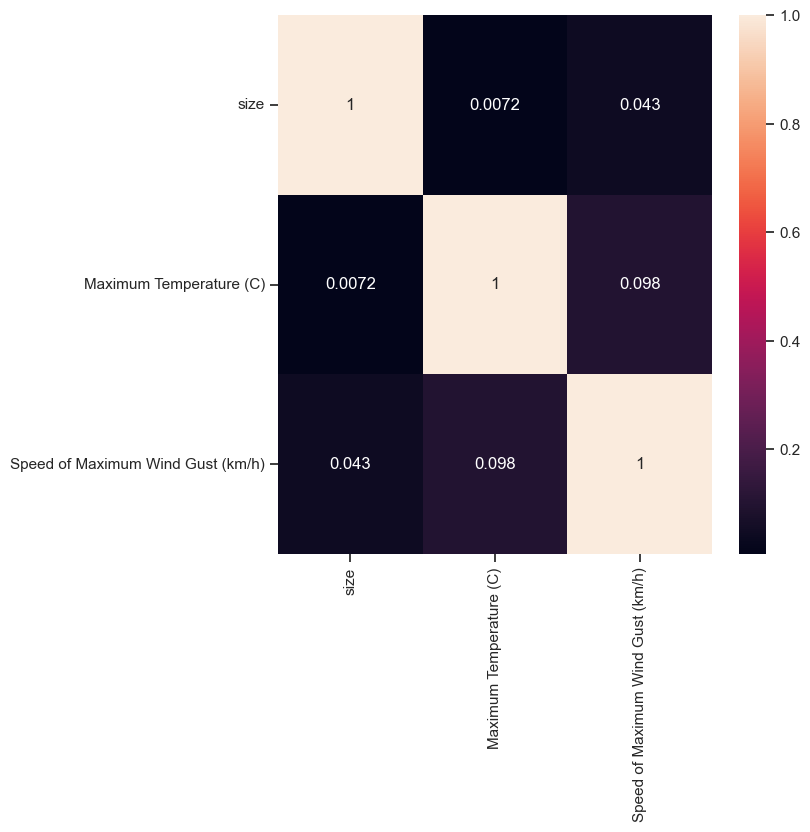

In [131]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Result:
- There is a weak positive relationship between fire spread and maximum temperature in Alberta. Apparently, the maximum temperature or maximum wind gust have a very small impact in spreading fire in forest range. This means increasing temperature or wind gust won't cause any huge effect in burning range of forests.

- This might be due to measurement bias - we don't khow the temperature and wind gust values at or around the fire location. We need to see if we have any other data available from which we can derive a more accurate reading for temperature, wind info, etc. at the fire location. In Alberta, for example, the distance between the fire and weather station locations average at more 300kms - this makes the readings pretty unreliable.

### 5.2 Scatterplots

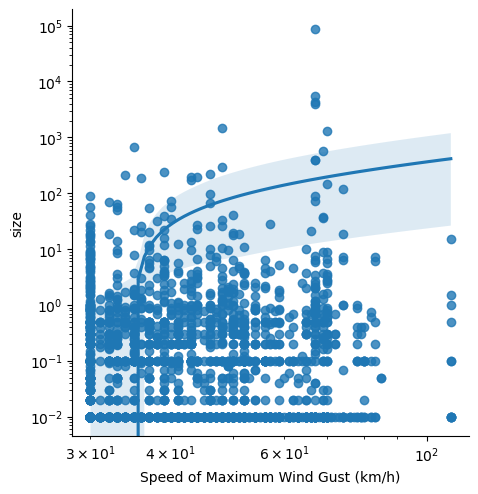

In [41]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn in log scale

sns.lmplot(y = 'size', x = 'Speed of Maximum Wind Gust (km/h)', data = df_human)

# Change the scale to logarithmic, because of the nature of the data (there is a large number of small values for both wind gust and fire size)
plt.xscale('log')
plt.yscale('log')

### Results:

- The plot shows a positive relationship between wind gust and the size of the fires, although the relationship seems to be pretty weak. Note that in the above plot, the axis scales were converted to logarithmic, because of the nature of the data (there is a large number of small values for both wind gust and fire size)

### 5.3 Pair Plots

#### N.B.: The size variable has a lot of outliers. Our analysis below shows that 90% of the data is less than 1.3. That's why we exclude values above that from the analysis.

In [67]:
sub['size'].value_counts(dropna = False)

0.01     1186
0.10      286
0.20      117
0.30       88
0.50       87
         ... 
6.56        1
2.27        1
1.85        1
21.90       1
26.00       1
Name: size, Length: 249, dtype: int64

In [68]:
sub['size'].describe()

count     2495.000000
mean        44.461387
std       1762.567722
min          0.010000
25%          0.010000
50%          0.020000
75%          0.300000
max      87659.400000
Name: size, dtype: float64

In [69]:
np.percentile(sub['size'], 90)

1.3

In [70]:
sub = sub[sub['size'] < 1.3]

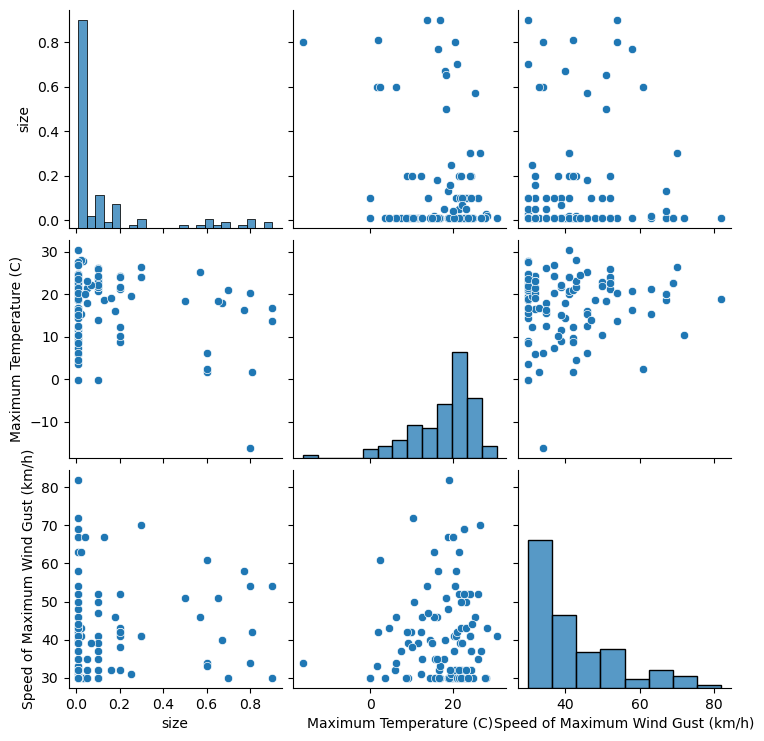

In [71]:
# Create a pair plot 

g = sns.pairplot(sub.sample(frac=0.05))

### Observation: 
Based on the first scatterplot on the bottom row, perhaps there is a closer relationship between fire spread and wind gust than between maximum temperature and fire spread.

### 5.4 Categorical Plots

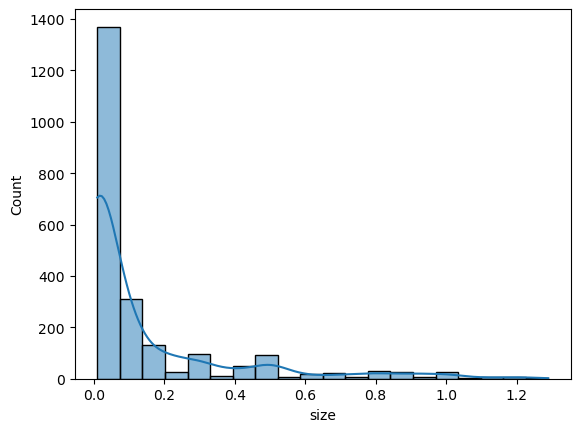

In [72]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the 'size' column's ranges. 
# The argument "kde" add a line that encompasses the distribution

histo_size= sns.histplot(sub['size'], bins= 20 , kde = True)
ax = plt.gca()
ax.set_ylim = ([0,900])

##### Creating a categorical variable that splits the "size" column into categories

In [82]:
# Deriving new column named size_class based on the size of fires in hectares

df_merged.loc[df_merged['size'] <= 0.1, 'size_class'] = 'Class A'
df_merged.loc[(df_merged['size'] > 0.1) & (df_merged['size'] < 4) , 'size_class'] = 'Class B'
df_merged.loc[(df_merged['size'] >= 4) & (df_merged['size'] < 40) , 'size_class'] = 'Class C'
df_merged.loc[(df_merged['size'] >= 40) & (df_merged['size'] < 121) , 'size_class'] = 'Class D'
df_merged.loc[df_merged['size'] >=121 , 'size_class'] = 'Class E'

In [80]:
df_merged.columns

Index(['src_agency', 'latitude', 'longitude', 'rep_date', 'size', 'cause',
       'prot_zone', 'eco_name', 'Station Latitude', 'Station Longitude',
       'Maximum Temperature (C)', 'Minimum Temperature (C)',
       'Mean Temperature (C)', 'Speed of Maximum Wind Gust (km/h)', 'distance',
       'size_class'],
      dtype='object')

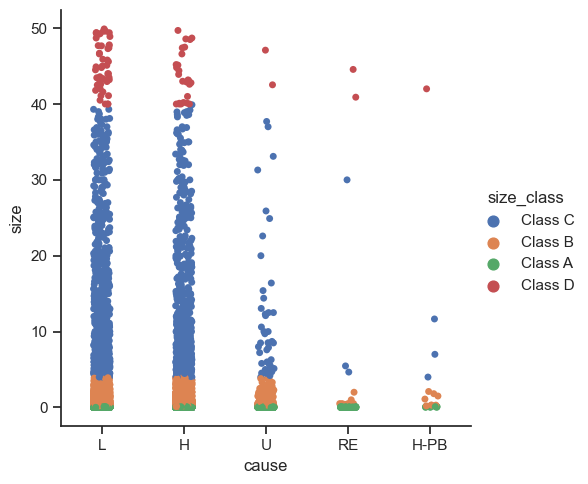

In [81]:
# Create a categorical plot in seaborn using the "size classes" created above

sns.set(style="ticks")
g = sns.catplot(x="cause", y="size", hue="size_class", data= df_merged[df_merged['size'] < 50])

#### Observations

Most of class C and D fires (4=> size <121 (hectares)) are either caused by lightning or are humand-caused. Most of prescribed burns are small in size (falling into class A and B which are in size of less than 4 hectares).

In [85]:
# Exporting merged dataframe in PKL format

df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data' , 'wthr_fires.pkl'))

### Revisit the questions 

#### 1. Assessing current fire activity by monitoring forest characteristics (e.g., cause, location)
- Most of the small fires are prescribed fires set by authorized forest managers to mimic natural fire processes to renew and maintain healthy ecosystems. 
- Most of the large-size fires are either caused by lightning or are human-caused. We need to plan to inform people how to picnic and barbeque in forests so that we would reduce the challenges of forest management and also  maintain healthy ecosystems. 

#### 2. Checking other variables like weather conditions (wind, temperature) to see if there is any relationship between those conditions and wildfire happened in a specific location (subject to the availability of data for weather conditions) 

- We were able to find the weather data for Alberta province/agency which is one of the top three agencies who reported the highest number of fires. After analysis and exploring data we found out there is a weak positive relationshop between fire spread and maximum temperature and also between fire spread and wind gust.

In the combination phase we used latitude and longitude to find the closet weather station to fire location so we could merged the data base on location.

### Hypothesis

- The large-size fires are either caused by lightning or are human-caused.
- Increasing the wind gust/ maxiumum temperature would lead an increase in size of fires.